<a href="https://colab.research.google.com/github/lukyg/bike_sharing_analysis/blob/main/Proyek_Analisis_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Ade Safarudin Madani
- **Email:** adesfrdnmdn@gmail.com
- **ID Dicoding:** ade_madani

## 1.&nbsp; Menentukan Pertanyaan Bisnis

- Berapa perbandingan jumlah peminjam yang terdaftar dan tidak terdaftar?
- Bagaimana pola penyewaan sepeda pada hari kerja dibanding hari libur?

## 2.&nbsp; Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

## 3.&nbsp; Data Wrangling

### 3.1 Gathering Data

#### 3.1.1 Ekstrak semua dataset

In [2]:
# Unduh dataset disimpan dalam format zip
!gdown --id 1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ -O Bike-sharing-dataset.zip

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1RaBmV6Q6FYWU4HWZs80Suqd7KQC34diQ
To: /content/Bike-sharing-dataset.zip
100% 280k/280k [00:00<00:00, 44.2MB/s]


In [3]:
!unzip Bike-sharing-dataset.zip

Archive:  Bike-sharing-dataset.zip
  inflating: Readme.txt              
  inflating: day.csv                 
  inflating: hour.csv                


#### 3.1.2 Membuat tabel day

In [4]:
day_df = pd.read_csv('/content/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


#### 3.1.3 Membuat tabel hour

In [5]:
hour_df = pd.read_csv('/content/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Pada dataset day memiliki 16 fitur dan dataset hour memiliki 17 fitur.
- Jika dilihat sekilas beberapa kolom memiliki penamaan yang kurang deskriptif seperti dteday, yr, mnth, atemp, hum dan cnt.

### 3.2 Assessing Data

#### 3.2.1 Menilai Data day_df

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [7]:
# cek missing value
day_df_missing_value = day_df.isna().sum()
print(day_df_missing_value)

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [8]:
print('Jumlah duplikasi:', day_df.duplicated().sum())

Jumlah duplikasi: 0


In [9]:
print(day_df.describe())

          instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.5448

#### 3.2.2 Menilai Data hour_df

In [10]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [11]:
hour_df_missing_value = [hour_df.isna().sum()]
hour_df_missing_value

[instant       0
 dteday        0
 season        0
 yr            0
 mnth          0
 hr            0
 holiday       0
 weekday       0
 workingday    0
 weathersit    0
 temp          0
 atemp         0
 hum           0
 windspeed     0
 casual        0
 registered    0
 cnt           0
 dtype: int64]

In [12]:
print('Jumlah duplikasi:', hour_df.duplicated().sum())

Jumlah duplikasi: 0


In [13]:
print(hour_df.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

**Insight:**
- Pada dataset day dan hour tergolong bersih karena pada dataset tersebut tidak ditemukan missing value, duplicated value.
- Pada dataset day dan hour terdapat beberapa kolom kategorikal season, yr, holiday, weekday, workingday dan weathersit yang disimpan dalam bentuk integer.
- Berapa kolom seperti temp, atemp, hum, dan windspeed memiliki nilai yang dinormalisasi dengan rentang 0 hingga 1 dari nilai aslinya.
- Pada kolom dteday merupakan datetime namun masih bertipe object.

### 3.3 Cleaning Data

In [14]:
# copy dataset asli untuk eksperimen
day_df_copy = day_df.copy()
hour_df_copy = hour_df.copy()

#### 3.3.1 Menangani dataset day_df

In [15]:
day_df_copy["dteday"] = pd.to_datetime(day_df_copy["dteday"])
day_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [16]:
# mengubah penamaan kolom
dict_name_column = {
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'hr': 'hour',
    'holiday': 'is_holiday',
    'weekday': 'day_of_week',
    'workingday': 'is_working_day',
    'weathersit': 'weather_situation',
    'atemp': 'feels_like_temp',
    'hum': 'humidity',
    'windspeed': 'wind_speed',
    'registered': 'registered',
    'cnt': 'total_count'
}

day_df_copy.rename(columns=dict_name_column, inplace=True)
day_df_copy.columns

Index(['instant', 'date', 'season', 'year', 'month', 'is_holiday',
       'day_of_week', 'is_working_day', 'weather_situation', 'temp',
       'feels_like_temp', 'humidity', 'wind_speed', 'casual', 'registered',
       'total_count'],
      dtype='object')

In [17]:
day_df_copy.sample(10)

,instant,date,season,year,month,is_holiday,day_of_week,is_working_day,weather_situation,temp,feels_like_temp,humidity,wind_speed,casual,registered,total_count
420,421,2012-02-25,1,1,2,0,6,0,1,0.290833,0.255675,0.395833,0.421642,317,2415,2732
239,240,2011-08-28,3,0,8,0,0,0,1,0.707059,0.647959,0.561765,0.304659,1415,2919,4334
31,32,2011-02-01,1,0,2,0,2,1,2,0.192174,0.234530,0.829565,0.053213,47,1313,1360
138,139,2011-05-19,2,0,5,0,4,1,2,0.530833,0.510742,0.829583,0.108213,735,3840,4575
418,419,2012-02-23,1,1,2,0,4,1,1,0.454167,0.444446,0.554583,0.190913,516,4546,5062
390,391,2012-01-26,1,1,1,0,4,1,2,0.341667,0.356050,0.769583,0.073396,244,3831,4075
28,29,2011-01-29,1,0,1,0,6,0,1,0.196522,0.212126,0.651739,0.145365,123,975,1098
215,216,2011-08-04,3,0,8,0,4,1,2,0.710000,0.664788,0.757500,0.197150,799,3777,4576
164,165,2011-06-14,2,0,6,0,2,1,1,0.604167,0.591546,0.507083,0.269283,727,4164,4891
371,372,2012-01-07,1,1,1,0,6,0,1,0.393333,0.390779,0.531667,0.174758,1070,3451,4521


In [18]:
# melakukan mapping pada nilai kategorikal yang tersimpan dalam int
season_mapping = {
    1: 'spring',
    2: 'summer',
    3: 'fall',
    4: 'winter'
}

year_mapping = {
    0: 2011,
    1: 2012
}

holiday_mapping = {
    0: 'no_holiday',
    1: 'holiday'
}

weekday_mapping = {
    0: 'sunday',
    1: 'monday',
    2: 'tuesday',
    3: 'wednesday',
    4: 'thursday',
    5: 'friday',
    6: 'saturday'
}

month_mapping = {
    1: 'january',
    2: 'february',
    3: 'march',
    4: 'april',
    5: 'may',
    6: 'june',
    7: 'july',
    8: 'august',
    9: 'september',
    10: 'october',
    11: 'november',
    12: 'december'
}

workingday_mapping = {
    0: 'no_working_day',
    1: 'working_day'
}

weather_situation_mapping = {
    1: 'clear, few clouds',
    2: 'mist + cloudy',
    3: 'light snow or rain',
    4: 'heavy rain, ice pallets or snow'
}

In [19]:
# menyisipkan hasil mapping di sebelah kolom aslinya
mappings = {
    'season': season_mapping,
    'month': month_mapping,
    'year': year_mapping,
    'is_holiday': holiday_mapping,
    'day_of_week': weekday_mapping,
    'is_working_day': workingday_mapping,
    'weather_situation': weather_situation_mapping
}

for col, mapping in mappings.items():
    col_index = day_df_copy.columns.get_loc(col)
    day_df_copy.insert(col_index + 1, f"{col}_mapped", day_df_copy[col].map(mapping))

In [20]:
day_df_copy.sample(10)

,instant,date,season,season_mapped,year,year_mapped,month,month_mapped,is_holiday,is_holiday_mapped,...,is_working_day_mapped,weather_situation,weather_situation_mapped,temp,feels_like_temp,humidity,wind_speed,casual,registered,total_count
664,665,2012-10-26,4,winter,1,2012,10,october,0,no_holiday,...,working_day,2,mist + cloudy,0.545833,0.522750,0.807083,0.132467,1182,6262,7444
611,612,2012-09-03,3,fall,1,2012,9,september,1,holiday,...,no_working_day,1,"clear, few clouds",0.707500,0.661629,0.790833,0.151121,1965,4069,6034
199,200,2011-07-19,3,fall,0,2011,7,july,0,no_holiday,...,working_day,1,"clear, few clouds",0.776667,0.747479,0.650417,0.130600,752,3789,4541
54,55,2011-02-24,1,spring,0,2011,2,february,0,no_holiday,...,working_day,2,mist + cloudy,0.295652,0.289191,0.697391,0.250496,100,1707,1807
621,622,2012-09-13,3,fall,1,2012,9,september,0,no_holiday,...,working_day,1,"clear, few clouds",0.612500,0.579558,0.637083,0.082721,1054,6750,7804
225,226,2011-08-14,3,fall,0,2011,8,august,0,no_holiday,...,no_working_day,2,mist + cloudy,0.676667,0.624388,0.817500,0.222633,1338,2482,3820
59,60,2011-03-01,1,spring,0,2011,3,march,0,no_holiday,...,working_day,1,"clear, few clouds",0.266667,0.263879,0.535000,0.216425,137,1714,1851
11,12,2011-01-12,1,spring,0,2011,1,january,0,no_holiday,...,working_day,1,"clear, few clouds",0.172727,0.160473,0.599545,0.304627,25,1137,1162
633,634,2012-09-25,4,winter,1,2012,9,september,0,no_holiday,...,working_day,1,"clear, few clouds",0.550000,0.544179,0.570000,0.236321,845,6693,7538
182,183,2011-07-02,3,fall,0,2011,7,july,0,no_holiday,...,no_working_day,1,"clear, few clouds",0.738333,0.667308,0.444583,0.115062,2204,2915,5119


#### 3.3.2 Menangani dataset hour_df

In [21]:
hour_df_copy["dteday"] = pd.to_datetime(hour_df_copy["dteday"])
hour_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

In [22]:
hour_df_copy.rename(columns=dict_name_column, inplace=True)
hour_df_copy.columns

Index(['instant', 'date', 'season', 'year', 'month', 'hour', 'is_holiday',
       'day_of_week', 'is_working_day', 'weather_situation', 'temp',
       'feels_like_temp', 'humidity', 'wind_speed', 'casual', 'registered',
       'total_count'],
      dtype='object')

In [23]:
hour_df_copy.sample(10)

,instant,date,season,year,month,hour,is_holiday,day_of_week,is_working_day,weather_situation,temp,feels_like_temp,humidity,wind_speed,casual,registered,total_count
6272,6273,2011-09-23,4,0,9,22,0,5,1,1,0.60,0.5152,0.94,0.1642,31,126,157
6703,6704,2011-10-11,4,0,10,21,0,2,1,2,0.58,0.5455,0.78,0.1940,17,158,175
3660,3661,2011-06-06,2,0,6,10,0,1,1,1,0.72,0.6667,0.51,0.2239,31,64,95
16879,16880,2012-12-11,4,1,12,2,0,2,1,2,0.40,0.4091,0.66,0.3284,0,1,1
8460,8461,2011-12-24,1,0,12,4,0,6,0,2,0.32,0.3182,0.66,0.1642,0,3,3
4534,4535,2011-07-12,3,0,7,20,0,2,1,1,0.82,0.7424,0.43,0.1940,57,251,308
1619,1620,2011-03-12,1,0,3,23,0,6,0,1,0.38,0.3939,0.66,0.0896,11,38,49
1227,1228,2011-02-24,1,0,2,6,0,4,1,1,0.20,0.1970,0.69,0.1940,0,58,58
1867,1868,2011-03-23,2,0,3,14,0,3,1,2,0.36,0.3636,0.87,0.1045,13,71,84
11737,11738,2012-05-09,2,1,5,6,0,3,1,2,0.56,0.5303,0.88,0.1045,5,121,126


In [24]:
hour_df_copy.rename(columns=dict_name_column, inplace=True)
hour_df_copy.columns

Index(['instant', 'date', 'season', 'year', 'month', 'hour', 'is_holiday',
       'day_of_week', 'is_working_day', 'weather_situation', 'temp',
       'feels_like_temp', 'humidity', 'wind_speed', 'casual', 'registered',
       'total_count'],
      dtype='object')

In [25]:
hour_df_copy.head()

,instant,date,season,year,month,hour,is_holiday,day_of_week,is_working_day,weather_situation,temp,feels_like_temp,humidity,wind_speed,casual,registered,total_count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [26]:
for col, mapping in mappings.items():
    col_index = hour_df_copy.columns.get_loc(col)
    hour_df_copy.insert(col_index + 1, f"{col}_mapped", hour_df_copy[col].map(mapping))

In [27]:
hour_df_copy.sample(10)

,instant,date,season,season_mapped,year,year_mapped,month,month_mapped,hour,is_holiday,...,is_working_day_mapped,weather_situation,weather_situation_mapped,temp,feels_like_temp,humidity,wind_speed,casual,registered,total_count
3414,3415,2011-05-27,2,summer,0,2011,5,may,4,0,...,working_day,1,"clear, few clouds",0.64,0.6061,0.69,0.1343,2,5,7
17021,17022,2012-12-17,4,winter,1,2012,12,december,0,0,...,working_day,2,mist + cloudy,0.38,0.3939,0.87,0.0000,2,26,28
5055,5056,2011-08-03,3,fall,0,2011,8,august,13,0,...,working_day,2,mist + cloudy,0.76,0.7121,0.58,0.2239,37,107,144
16963,16964,2012-12-14,4,winter,1,2012,12,december,14,0,...,working_day,1,"clear, few clouds",0.40,0.4091,0.43,0.1940,48,251,299
14385,14386,2012-08-27,3,fall,1,2012,8,august,14,0,...,working_day,1,"clear, few clouds",0.80,0.7424,0.49,0.0896,66,180,246
13990,13991,2012-08-11,3,fall,1,2012,8,august,3,0,...,no_working_day,3,light snow or rain,0.62,0.5758,0.83,0.1642,2,19,21
10012,10013,2012-02-27,1,spring,1,2012,2,february,5,0,...,working_day,1,"clear, few clouds",0.22,0.2273,0.80,0.1343,0,16,16
14772,14773,2012-09-12,3,fall,1,2012,9,september,17,0,...,working_day,1,"clear, few clouds",0.70,0.6364,0.41,0.2985,114,811,925
3699,3700,2011-06-08,2,summer,0,2011,6,june,1,0,...,working_day,1,"clear, few clouds",0.66,0.6061,0.78,0.0000,3,20,23
14809,14810,2012-09-14,3,fall,1,2012,9,september,6,0,...,working_day,1,"clear, few clouds",0.54,0.5152,0.88,0.0000,8,144,152


In [28]:
# export hour_df_copy ke csv
hour_df_copy.to_csv('main_data.csv', index=False)

**Insight:**
- Perbaikan tipe data telah dilakukan pada kolom dteday, yang awalnya bertipe object diubah menjadi datetime untuk mempermudah analisis berbasis waktu.
- Pemeriksaan data menunjukkan bahwa kedua dataset relatif bersih, tanpa nilai kosong (missing values) maupun duplikasi, sehingga dapat langsung dianalisis lebih lanjut untuk melihat distribusi data.
- Transformasi data kategorik dilakukan melalui mapping pada beberapa kolom untuk meningkatkan interpretasi data. Kolom hasil mapping ditambahkan di sebelah kanan kolom aslinya tanpa menggantikan nilai asli, guna mempermudah pemahaman data saat analisis.

## 4.&nbsp; Exploratory Data Analysis (EDA)

### 4.1 Statistik Deskriptif

In [29]:
hour_df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   instant                   17379 non-null  int64         
 1   date                      17379 non-null  datetime64[ns]
 2   season                    17379 non-null  int64         
 3   season_mapped             17379 non-null  object        
 4   year                      17379 non-null  int64         
 5   year_mapped               17379 non-null  int64         
 6   month                     17379 non-null  int64         
 7   month_mapped              17379 non-null  object        
 8   hour                      17379 non-null  int64         
 9   is_holiday                17379 non-null  int64         
 10  is_holiday_mapped         17379 non-null  object        
 11  day_of_week               17379 non-null  int64         
 12  day_of_week_mapped

In [30]:
# menggunakan hour_df untuk melihat statistik deskriptif lebih rinci
# cek untuk numerik
hour_df_numeric = hour_df_copy[[
                               'hour',
                               'temp',
                               'feels_like_temp',
                               'humidity',
                               'wind_speed',
                               'casual',
                               'registered',
                               'total_count']]
print(hour_df_numeric.describe())

               hour          temp  feels_like_temp      humidity  \
count  17379.000000  17379.000000     17379.000000  17379.000000   
mean      11.546752      0.496987         0.475775      0.627229   
std        6.914405      0.192556         0.171850      0.192930   
min        0.000000      0.020000         0.000000      0.000000   
25%        6.000000      0.340000         0.333300      0.480000   
50%       12.000000      0.500000         0.484800      0.630000   
75%       18.000000      0.660000         0.621200      0.780000   
max       23.000000      1.000000         1.000000      1.000000   

         wind_speed        casual    registered   total_count  
count  17379.000000  17379.000000  17379.000000  17379.000000  
mean       0.190098     35.676218    153.786869    189.463088  
std        0.122340     49.305030    151.357286    181.387599  
min        0.000000      0.000000      0.000000      1.000000  
25%        0.104500      4.000000     34.000000     40.000000  
50%

**Insight**:
- Asumsi adanya right skewed (skew positif) dari fitur wind, casual, registered dan total_count dilihat dari selisih antara nilai maksimum dengan nilai kuartil ketiga (Q3) nya yang cukup besar. Agar lebih mudah melihat distribusinya dibuat histrogram.

In [31]:
# cek untuk kategorik
hour_df_copy.describe(include='object')

,season_mapped,month_mapped,is_holiday_mapped,day_of_week_mapped,is_working_day_mapped,weather_situation_mapped
count,17379,17379,17379,17379,17379,17379
unique,4,12,2,7,2,4
top,fall,may,no_holiday,saturday,working_day,"clear, few clouds"
freq,4496,1488,16879,2512,11865,11413


**Insight:**
- Kolom dengan tipe data numerik sebanyak 8 fitur.
- Kolom dengan tipe data kategorik sebanyak 7 fitur.
- Fitur ini diluar dari fitur-fitur yang sudah dilakukan mapping untuk memudahkan intepretasi data.

### 4.2 Cek distribusi data

### 4.2.1 Distribusi data numerik

In [32]:
# cek distribusi data numerik
def check_distribution(hour_df_copy, column):
    plt.figure(figsize=(10, 6))
    sns.histplot(hour_df_copy[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

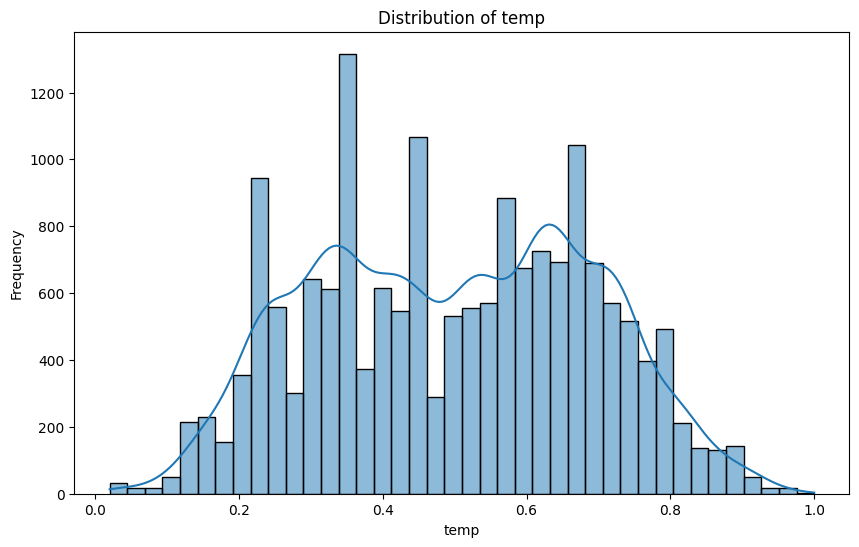

In [33]:
check_distribution(hour_df_copy, 'temp')

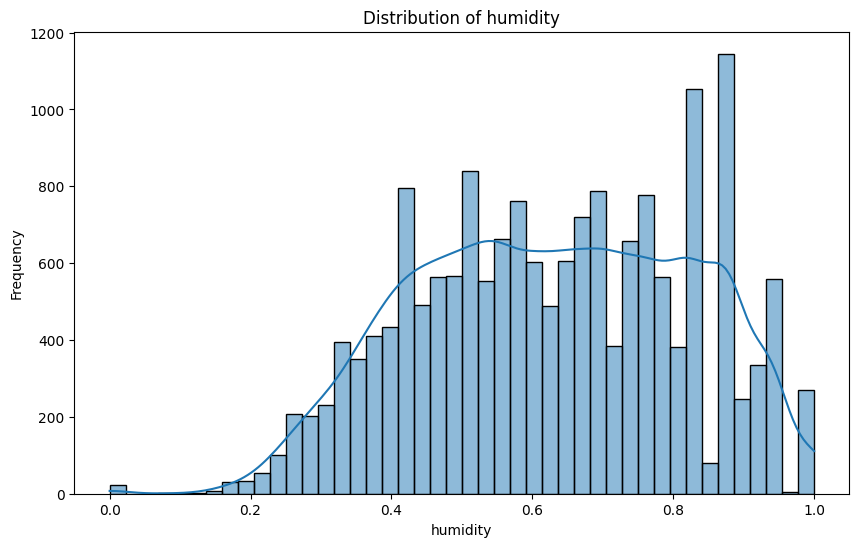

In [34]:
check_distribution(hour_df_copy, 'humidity')

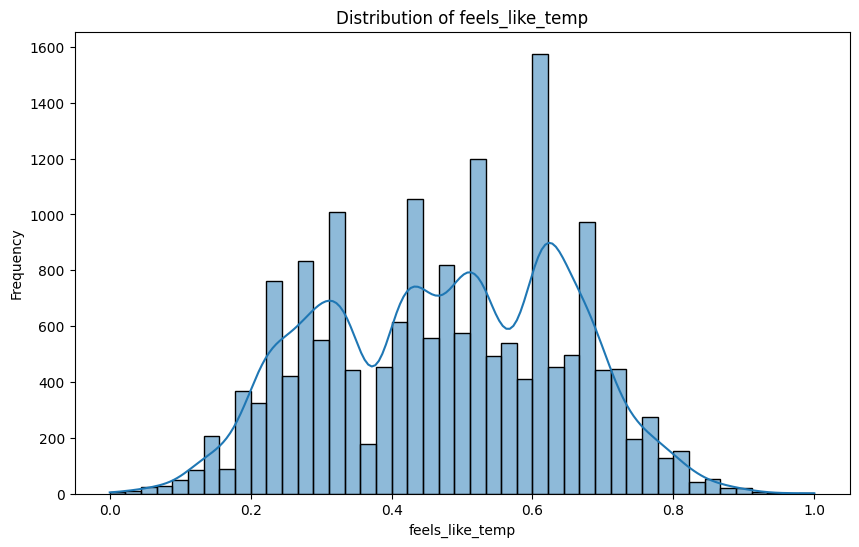

In [35]:
check_distribution(hour_df_numeric, 'feels_like_temp')

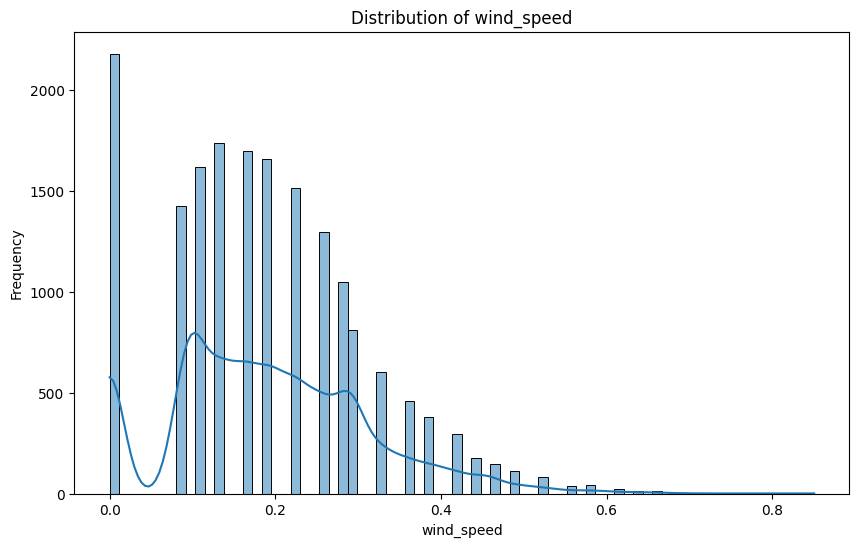

In [36]:
check_distribution(hour_df_numeric, 'wind_speed')

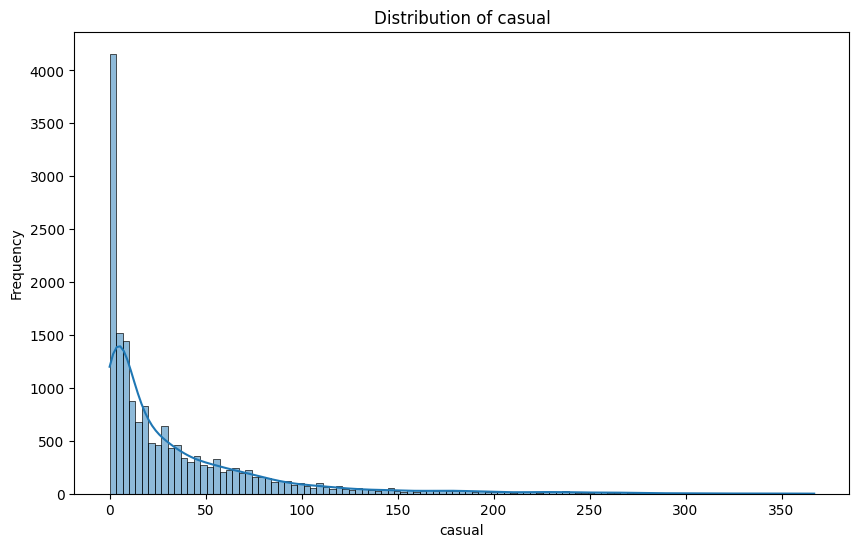

In [37]:
check_distribution(hour_df_numeric, 'casual')

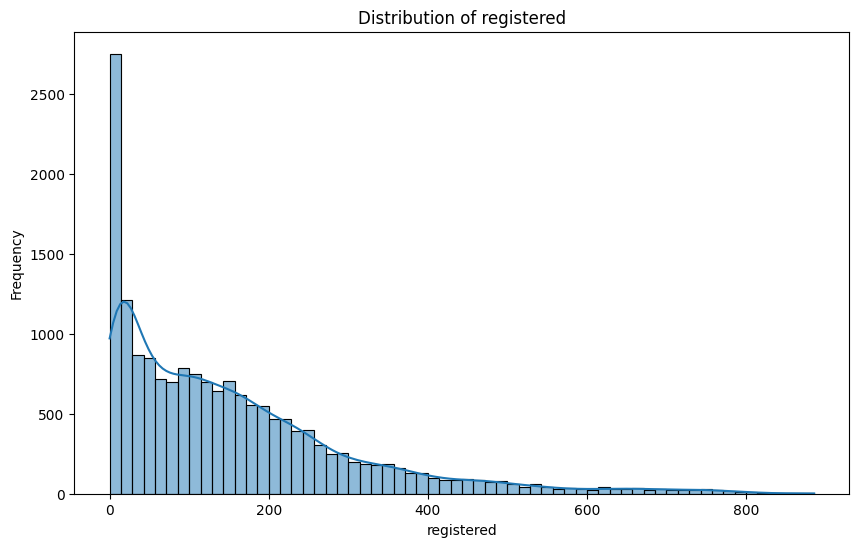

In [38]:
check_distribution(hour_df_numeric, 'registered')

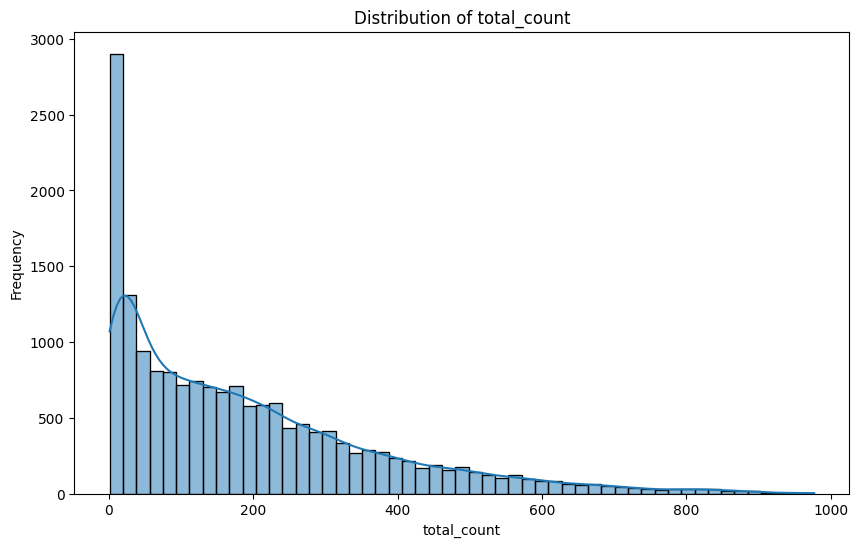

In [39]:
check_distribution(hour_df_numeric, 'total_count')

**Insight:**
- Kolom temp, humidity, feels_like_temp memiliki distribusi yang mendekati normal, meskipun mungkin sedikit skewed.
- wind_speed, casual, registered dan total_count distribusi yang right-skewed ditandai dengan ekor panjang ke kiri.
- Jika fitur ini akan digunakan untuk proses prediksi, skewness yang berlebihan perlu ditangani agar distribusi data menjadi normal. Agar saat data ini digunakan untuk prediksi, model tidak salah dalam memahami data. Misalnya menggunakan transformasi log atau box-cox.

### 4.2.2 Distribusi data kategorik

In [40]:
def check_categorical_distribution(hour_df_copy, column):
    plt.figure(figsize=(12, 6))
    sns.countplot(data=hour_df_copy, hue=column, x=column, palette='viridis', legend=False)
    plt.title(f'Distribution of {column}')
    plt.ylabel('Frequency')
    plt.show()

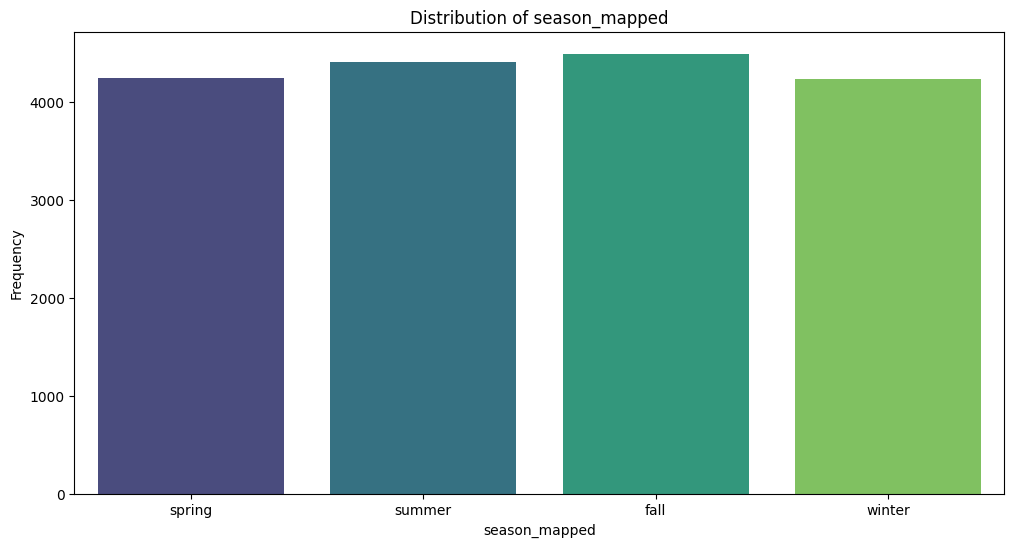

In [41]:
check_categorical_distribution(hour_df_copy, 'season_mapped')

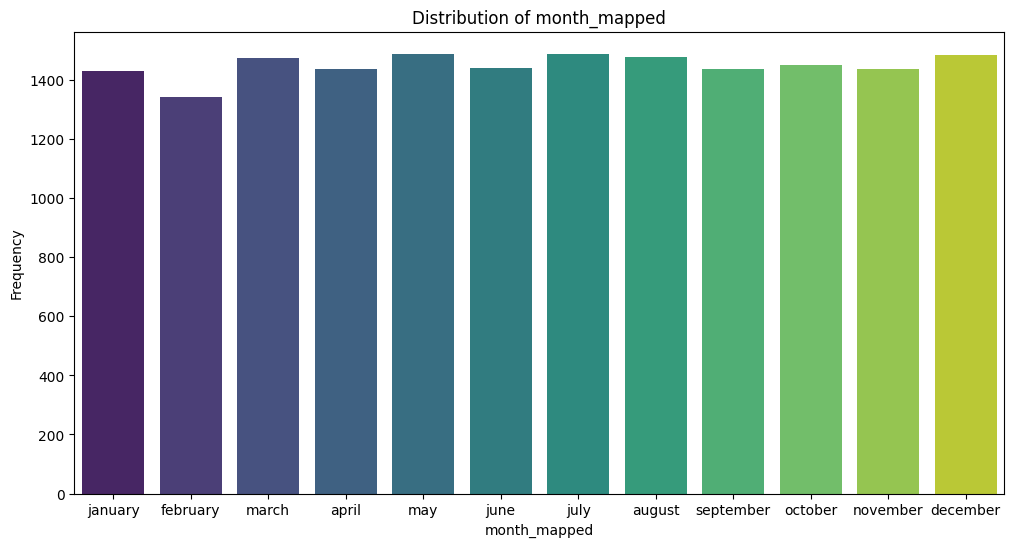

In [42]:
check_categorical_distribution(hour_df_copy, 'month_mapped')

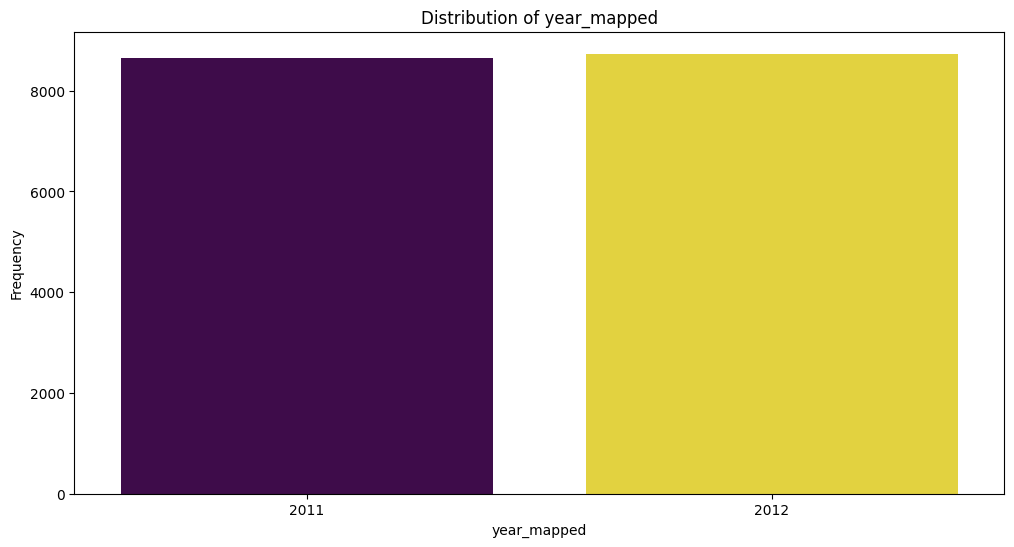

In [43]:
check_categorical_distribution(hour_df_copy, 'year_mapped')

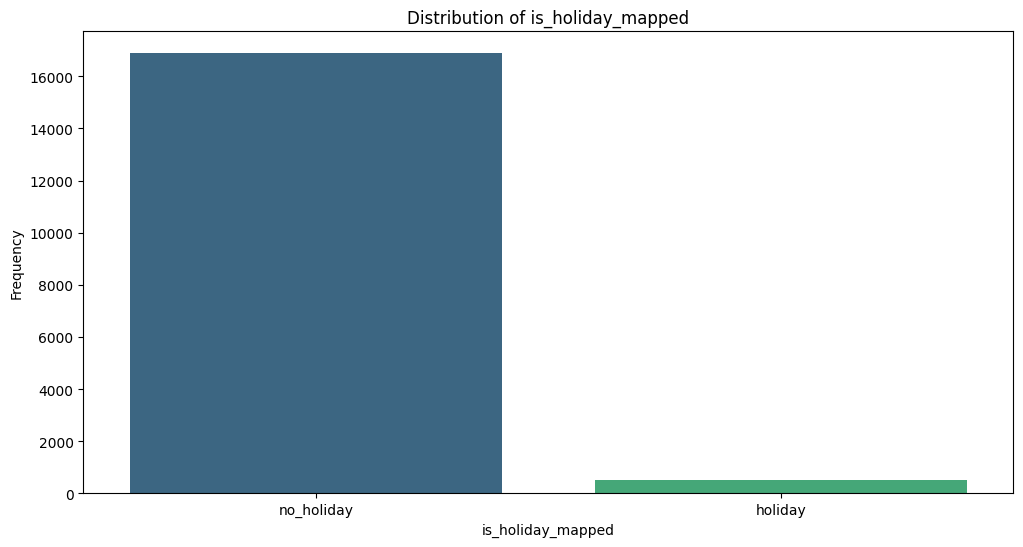

In [44]:
check_categorical_distribution(hour_df_copy, 'is_holiday_mapped')

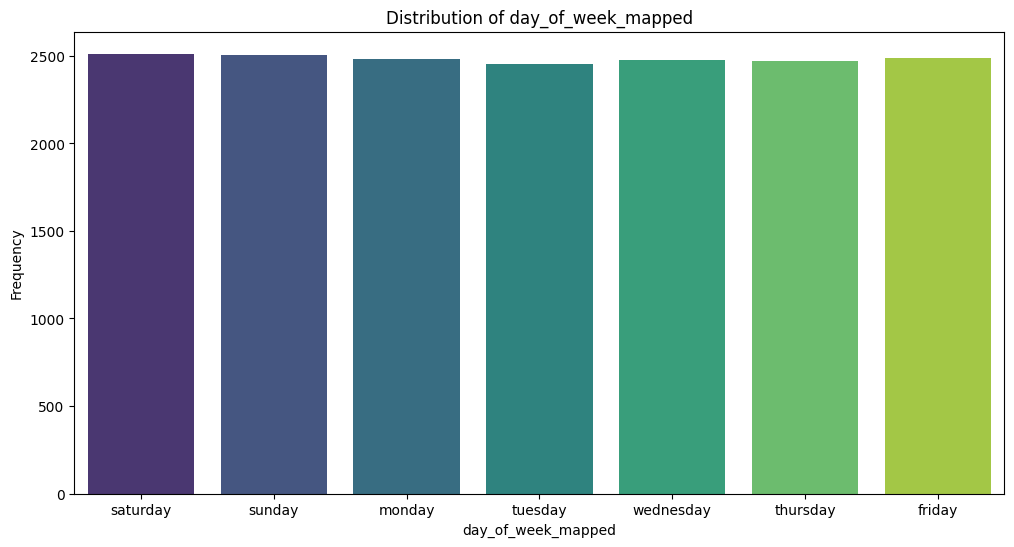

In [45]:
check_categorical_distribution(hour_df_copy, 'day_of_week_mapped')

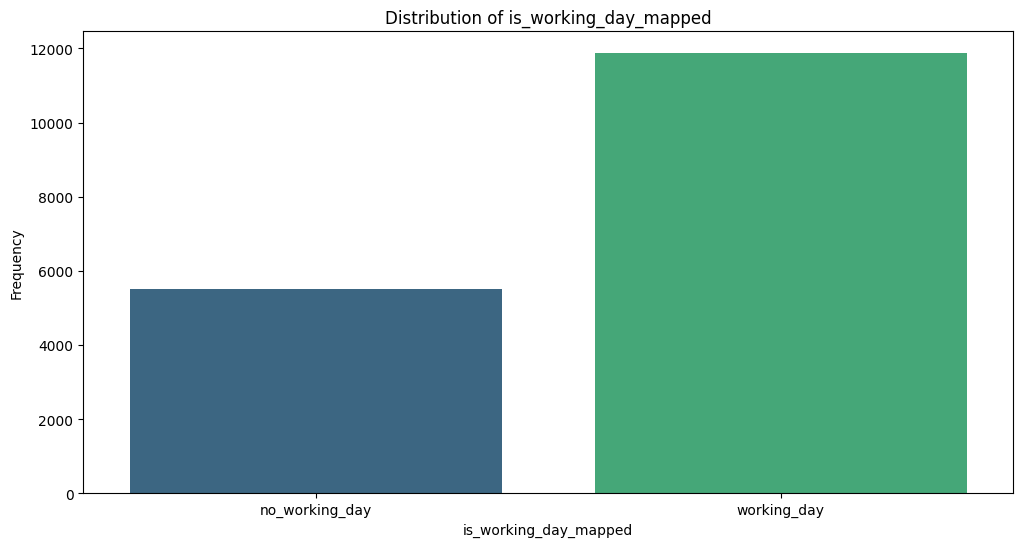

In [46]:
check_categorical_distribution(hour_df_copy, 'is_working_day_mapped')

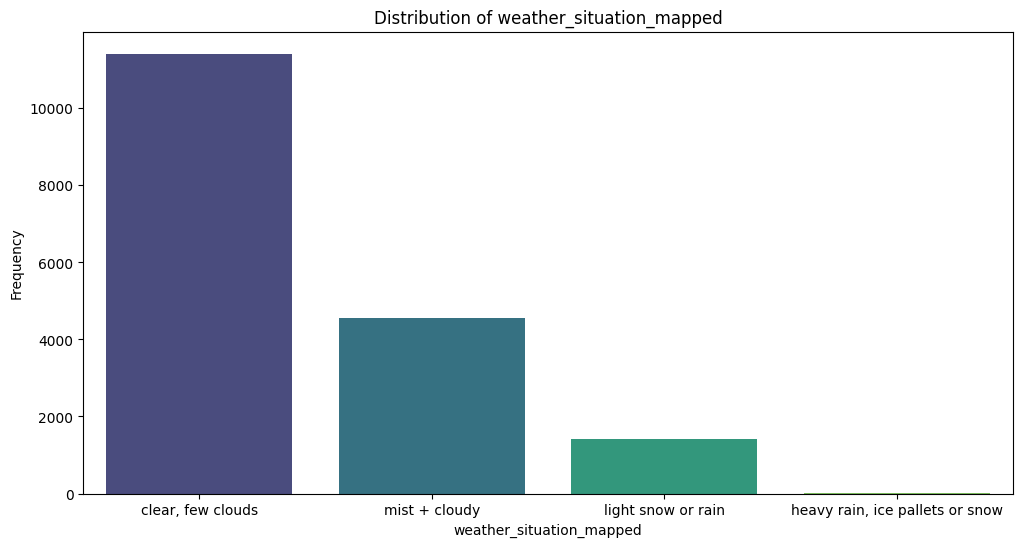

In [47]:
check_categorical_distribution(hour_df_copy, 'weather_situation_mapped')

**Insight:**
- Dengan kondisi brazil, asal dataset ini diambil, mayoritas penyewaan sepeda dilakukan pada hari kerja dengan kondisi cuaca yang cerah.
- penyewaan sepeda tertinggi pada musim gugur(fall), musim panas (summer), musim semi (spring) dan musim dingin (winter) dengan selisih perbedaan yang sedikit.

## 5.&nbsp; Visualization & Explanatory Analysis

### 5.1 Pertanyaan 1: Berapa perbandingan jumlah peminjam yang terdaftar dan tidak terdaftar?

'Jumlah penyewa yang tidak terdaftar (casual): 620017'

'Jumlah penyewa yang terdaftar (registered): 2672662'

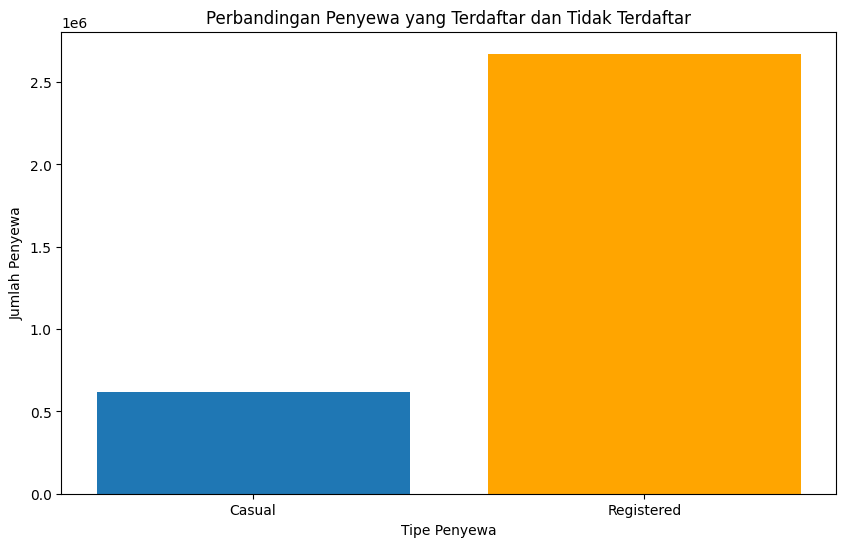

In [48]:
display(f"Jumlah penyewa yang tidak terdaftar (casual): {hour_df_copy['casual'].sum()}")
display(f"Jumlah penyewa yang terdaftar (registered): {hour_df_copy['registered'].sum()}")

plt.figure(figsize=(10, 6))
plt.bar(
    ['Casual', 'Registered'],
    [hour_df_copy['casual'].sum(), hour_df_copy['registered'].sum()],
    color=['#1f77b4', 'orange']
    )
plt.xlabel('Tipe Penyewa')
plt.ylabel('Jumlah Penyewa')
plt.title('Perbandingan Penyewa yang Terdaftar dan Tidak Terdaftar')
plt.show()

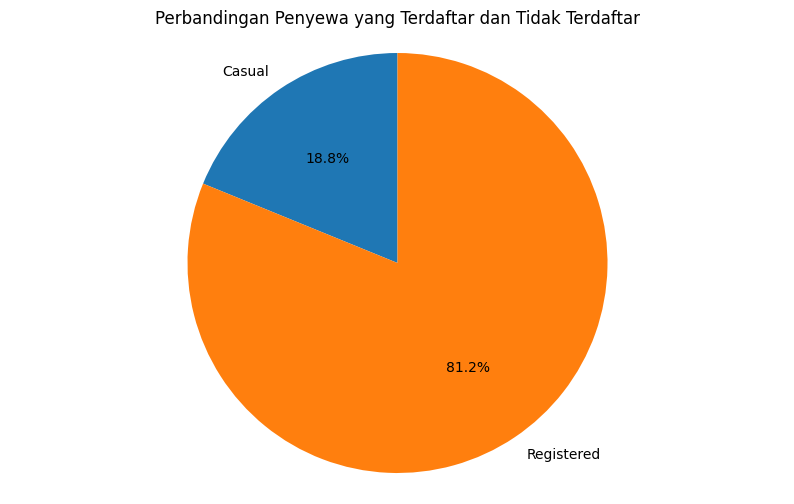

In [49]:
plt.figure(figsize=(10, 6))
plt.pie(
    [hour_df_copy['casual'].sum(), hour_df_copy['registered'].sum()],
    labels=['Casual', 'Registered'],
    autopct='%1.1f%%',
    startangle=90
)
plt.title('Perbandingan Penyewa yang Terdaftar dan Tidak Terdaftar')
plt.axis('equal')
plt.show()

**Insight:**
- Sebagian besar peminjam sepeda adalah pengguna yang terdaftar (registered), dengan jumlah 2.672.662 orang (81.17%), sedangkan peminjam tidak terdaftar (casual) hanya 620.017 orang (18.83%). Hal ini menunjukkan bahwa sebagian besar pengguna memilih untuk mendaftar dibanding menggunakan sistem casual.

### 5.2 Pertanyaan 2: Bagaimana pola penyewaan sepeda pada hari kerja dibanding hari libur?


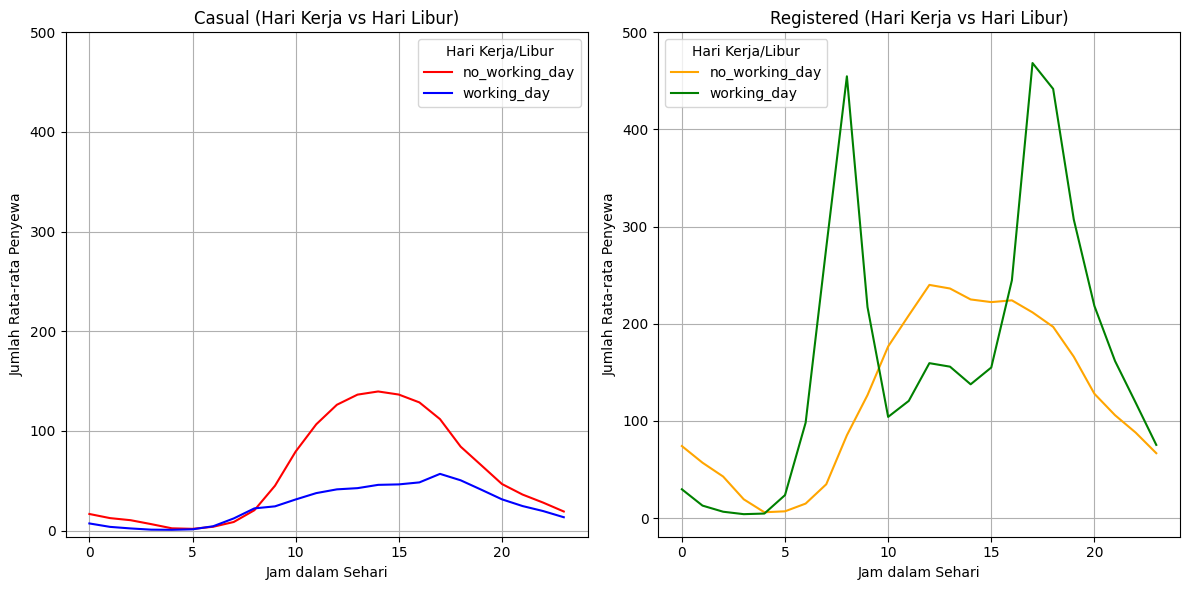

In [50]:
hourly_pattern = hour_df_copy.groupby([
    'is_working_day_mapped',
    'hour'])[['casual', 'registered']].mean().reset_index()

plt.figure(figsize=(12, 6))
yticks_range = range(0,501,100)

# Subplot 1: Casual
plt.subplot(1, 2, 1)
sns.lineplot(
    data=hourly_pattern,
    x='hour',
    y='casual',
    hue='is_working_day_mapped',

    palette=['red', 'blue'])

plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Rata-rata Penyewa")
plt.title("Casual (Hari Kerja vs Hari Libur)")
plt.legend(title="Hari Kerja/Libur")
plt.yticks(yticks_range)
plt.grid(True)

# Subplot 2: Registered
plt.subplot(1, 2, 2)
sns.lineplot(
    data=hourly_pattern,
    x='hour',
    y='registered',
    hue='is_working_day_mapped',
    palette=['orange', 'green'])

plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Rata-rata Penyewa")
plt.title("Registered (Hari Kerja vs Hari Libur)")
plt.legend(title="Hari Kerja/Libur")
plt.yticks(yticks_range)
plt.grid(True)

plt.tight_layout()
plt.show()


**Insight:**
- Pada penyewa yang tidak terdaftar (casual), saat hari hari kerja dan hari libur penyewaan cenderung dilakukan pada jam 10 hingga 18. Hal ini bisa diasumsikan bahwa jam-jam tersebut adalah waktu luang bagi penyewa casual untuk bersepeda, misalnya digunakan untuk perjalanan singkat atau rekreasi.
- Pada penyewa yang terdaftar (registered) memiliki pola yang sangat mencolok, saat hari kerja, dimana pada antara jam 5-10 dan jam 15-20 memiliki aktivitas tertinggi. Hal ini diasumsikan bahwa penyewa registered menggunakan sepeda sebagai transportasi untuk berangkat dan pulang kerja. Sedangkan saat hari libur, penyewaan sepeda cukup tinggi diasumsikan bahwa penyewa registered melakukan olahraga bersepeda.

## 5.3 Analisis Lanjutan

Clustering Manual/Binning dari penyewa casual dan registered berdasarkan rata-rata jumlah penyewaan di tiap jamnya baik pada hari kerja maupun hari libur dengan aturan sebagai berikut.
- Low : 0-50 penyewa
- Medium : 51-200 penyewa
- High : 201+

In [120]:
# Binning untuk casual
hourly_pattern['casual_bin'] = pd.cut(hourly_pattern['casual'],
                                      bins=[-1, 50, 200, float('inf')],
                                      labels=['Low Rent', 'Medium Rent', 'High Rent'])

# Binning untuk registered
hourly_pattern['registered_bin'] = pd.cut(hourly_pattern['registered'],
                                          bins=[-1, 50, 200, float('inf')],
                                          labels=['Low Rent', 'Medium Rent', 'High Rent'])

# Cek hasil binning
hourly_pattern.head()

,is_working_day_mapped,hour,casual,registered,casual_bin,registered_bin
0,no_working_day,0,16.647826,74.152174,Low Rent,Medium Rent
1,no_working_day,1,12.504348,57.004348,Low Rent,Medium Rent
2,no_working_day,2,10.399123,42.771930,Low Rent,Low Rent
3,no_working_day,3,6.453744,19.321586,Low Rent,Low Rent
4,no_working_day,4,2.264317,6.000000,Low Rent,Low Rent


In [121]:
hourly_pattern['casual_bin'].value_counts()

,count
casual_bin,
Low Rent,36
Medium Rent,12
High Rent,0


In [122]:
hourly_pattern['registered_bin'].value_counts()

,count
registered_bin,
Medium Rent,21
High Rent,15
Low Rent,12


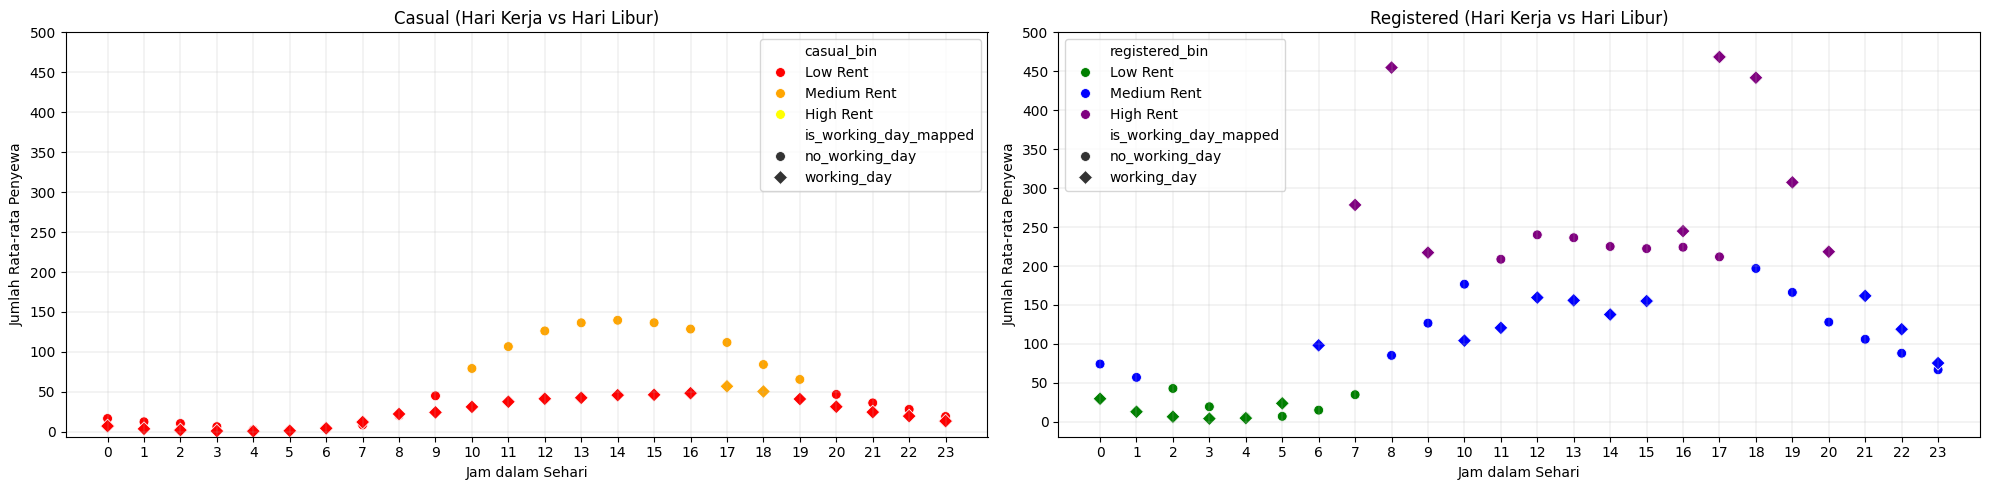

In [123]:
# Membuat scatter plot untuk melihat sebaran cluster
plt.figure(figsize=(20, 5))
yticks_range = range(0, 501, 50)
xticks_range = range(0, 24, 1)

# Untuk penyewa casual
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=hourly_pattern,
    x='hour',
    y='casual',
    hue='casual_bin',
    style='is_working_day_mapped',
    palette=['red', 'orange', 'yellow'],
    markers=['o', 'D'],
    s=50
)
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Rata-rata Penyewa")
plt.title("Casual (Hari Kerja vs Hari Libur)")
plt.yticks(yticks_range)
plt.xticks(xticks_range)
plt.grid(True, linewidth=0.2)

# Untuk penyewa registered
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=hourly_pattern,
    x='hour',
    y='registered',
    hue='registered_bin',
    style='is_working_day_mapped',
    palette=['green', 'blue', 'purple'],
    markers=['o', 'D'],
    s=50
)
plt.xlabel("Jam dalam Sehari")
plt.ylabel("Jumlah Rata-rata Penyewa")
plt.title("Registered (Hari Kerja vs Hari Libur)")
plt.yticks(yticks_range)
plt.xticks(xticks_range)
plt.grid(True, linewidth=0.2)

plt.tight_layout()
plt.show()

**Insight**:
- Sebagian besar penyewa casual masuk kategori "Low Rent" sepanjang hari di hari kerja kecuali jam 17 hingga 18 masuk dalam kategori "Medium Rent". Berbeda pada hari libur dimana pada jam 10 hingga 19 masuk dalam kategori "Medium Rent". Namun, baik pada hari kerja maupun libur tidak ada jam yang masuk kategori "High Rent", artinya jumlah penyewa casual tidak pernah melonjak drastis. Pola ini menunjukkan bahwa penyewa casual aktif di siang hingga sore hari, kemungkinan saat jam makan siang atau sekedar perjalanan singkat.
- Berbeda dengan penyewa registered yang memiliki pola bervariasi. Di hari kerja, Pada jam-jam awal (00:00-05.00) jumlah penyewa rendah ("Low Rent") kemudian mulai melonjak dari jam 7 hingga 8 yang diasumsikan sebagai jam keberangkatan kerja. Lonjakan juga terlihat pada jam 17 hingga 18 yang diasumsikan sebagai jam pulang kerja. Sedangkan di hari libur, aktivitas tinggi terjadi di jam 11 hingga 17. Pola ini menunjukkan bahwa penyewa registered menggunakan sepeda sebagai transportasi utama baik untuk bekerja maupun aktivitas lainnya seperti olahraga dan rekreasi.

## Conclusion

- Sebagian besar peminjam sepeda adalah pengguna terdaftar sebanyak 2.672.662 dengan persentase 81,17%, sedangkan peminjam tidak terdaftar sebanyak 620.017 dengan persentase 18,83%. Hal ini terjadi karena sebagian besar penyewa menggunakan sepeda sebagai transportasi utama. Sehingga rekomendasinya yaitu pada strategi retensi pengguna terdaftar dengan menawarkan program loyalitas atau fitur tambahan, sekaligus meningkatkan promosi kepada pengguna tidak terdaftar dengan memberikan insentif pendaftaran, seperti diskon perjalanan pertama atau akses ke jalur khusus.

- Pengguna tidak terdaftar cenderung meminjam sepeda antara pukul 10–18 baik di hari kerja maupun hari libur, menunjukkan pemakaian untuk rekreasi atau perjalanan santai. Sebaliknya, pengguna terdaftar memiliki pola penggunaan yang lebih teratur di hari kerja, dengan puncak aktivitas pada pukul 5–10 dan 15–20, yang mengindikasikan penggunaan untuk perjalanan kerja. Di hari libur, aktivitas pengguna terdaftar lebih merata, kemungkinan besar untuk olahraga atau aktivitas rekreasi. Sehingga rekomendasinya adalah mengoptimalkan penyediaan sepeda di pagi dan sore hari selama hari kerja untuk mendukung pengguna terdaftar dan menawarkan paket rekreasi atau tarif khusus di siang hari pada akhir pekan untuk menarik pengguna kasual.